# Simple moving average crossover

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [27]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import ATR
from util.SMA import SMA
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
from SMA_crossover import SMA_crossover

## Get Data

In [16]:
XAUUSD = load_data()

In [17]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

```python
class SMA_crossover(Strategy) :
    ATR_SL = 0.5
    def init(self):
        self.data.df['ATR'] = ATR(self.data.df, 20)['ATR']
        self.data.df['sma_fast'] = SMA(self.data.df,50,200)['sma_fast']
    def next(self):

        pre_sma_fast = self.data.df.loc[self.data.df.index[-2], 'sma_fast']
        pre_sma_low = self.data.df.loc[self.data.df.index[-2], 'sma_slow']
        current_sma_fast = self.data.df.loc[self.data.df.index[-1], 'sma_fast']
        current_sma_low = self.data.df.loc[self.data.df.index[-1], 'sma_slow']
        current_ATR = self.data.df.loc[self.data.df.index[-1], 'ATR']

        if  pre_sma_fast < pre_sma_low and current_sma_fast >= current_sma_low and  not self.position :
            tp = self.data.Close + current_ATR * self.ATR_SL
            sl = self.data.Close - current_ATR * self.ATR_SL
            # Place your buy logic here
            self.buy(sl=sl, tp=tp, size=1)

        if pre_sma_fast > pre_sma_low and current_sma_fast <= current_sma_low and not self.position:
            tp = self.data.Close - current_ATR * self.ATR_SL
            sl = self.data.Close + current_ATR * self.ATR_SL
               
            self.sell(sl=sl, tp=tp, size=1)
```

In [23]:
SMA_crossover

SMA_crossover.SMA_crossover

In [24]:
account_size = 20000

# Backtest each time frame

## TF D1

In [26]:
Backtest_D1 = Backtest(XAUUSD['D1'], SMA_crossover, cash=account_size, margin=1/2000, )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                    0.694031
Equity Final [$]                  19998.06745
Equity Peak [$]                  20016.353225
Return [%]                          -0.009663
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                   -0.000483
Volatility (Ann.) [%]                0.048614
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.184746
Avg. Drawdown [%]                   -0.097218
Max. Drawdown Duration     3827 days 00:00:00
Avg. Drawdown Duration     1340 days 00:00:00
# Trades                                   26
Win Rate [%]                             50.0
Best Trade [%]                       1.298639
Worst Trade [%]                     -1.168618
Avg. Trade [%]                    

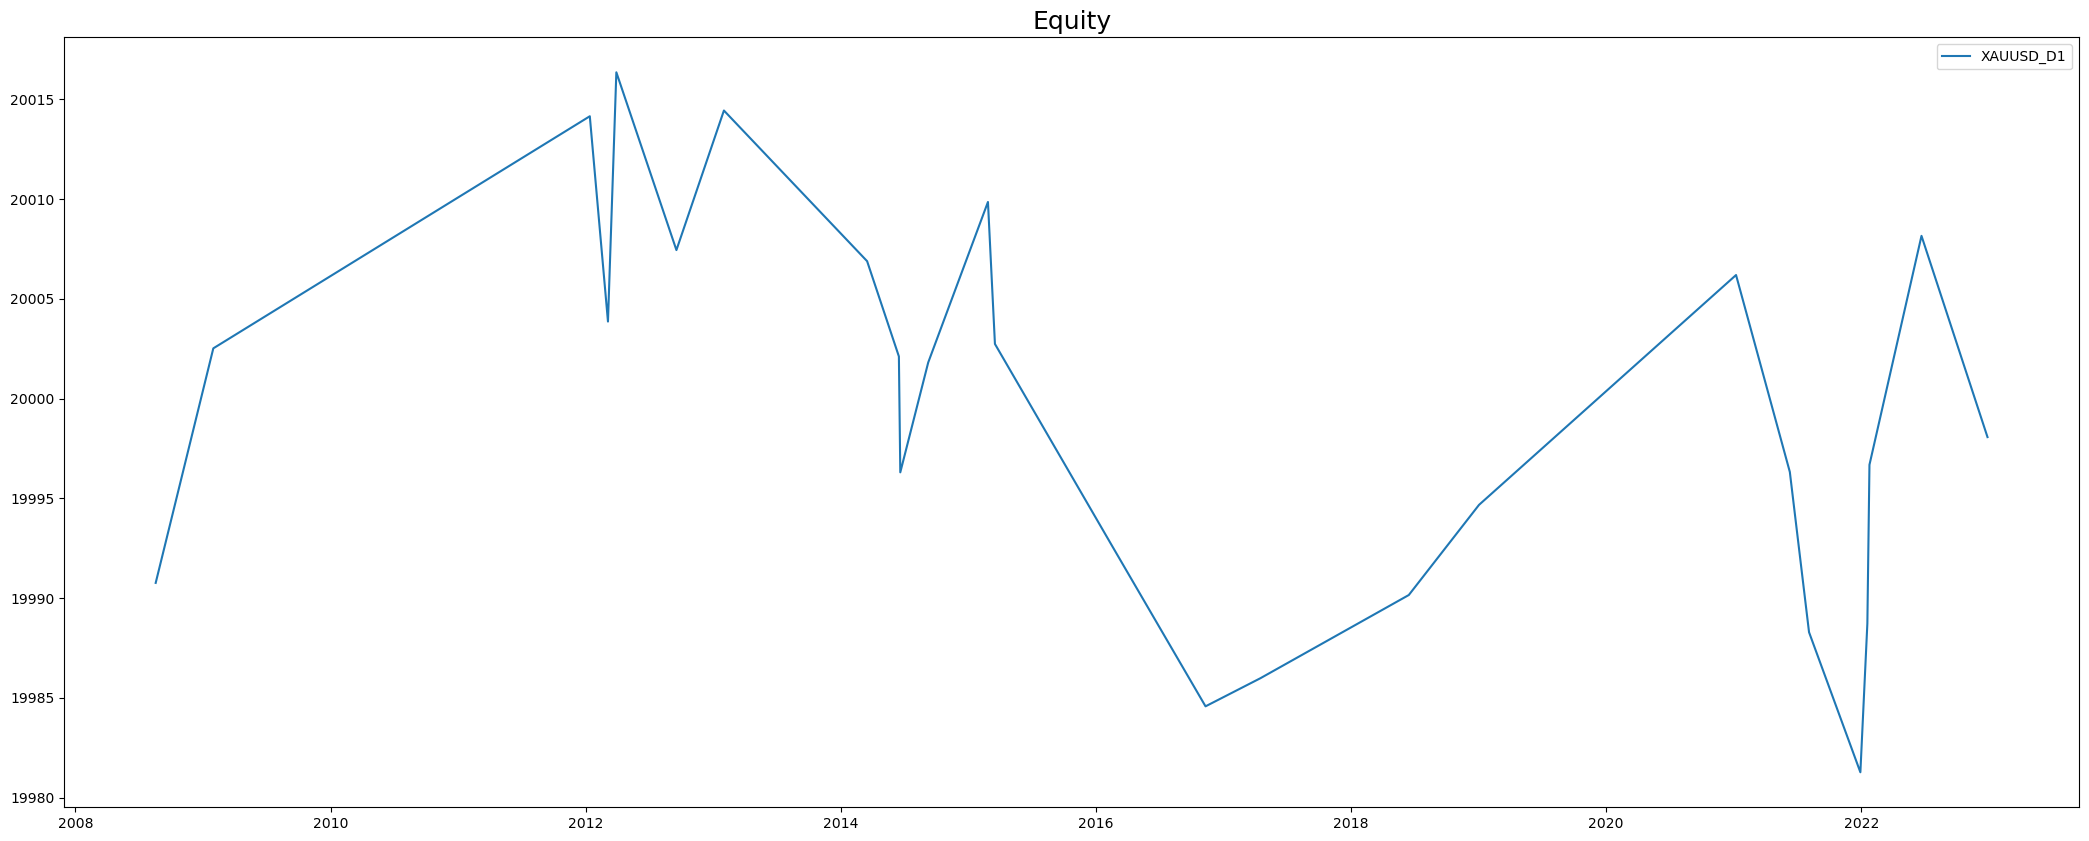

In [43]:
plot_equity_trades(result_D1['_trades'],'XAUUSD_D1' , account_size)

## TF H4

In [30]:
Backtest_H4 = Backtest(XAUUSD['H4'], SMA_crossover,
                       cash=account_size, margin=1/2000, )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                    1.000924
Equity Final [$]                 19967.233175
Equity Peak [$]                  20019.419575
Return [%]                          -0.163834
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                   -0.008193
Volatility (Ann.) [%]                0.058583
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                    -0.41505
Avg. Drawdown [%]                   -0.094703
Max. Drawdown Duration     2933 days 08:00:00
Avg. Drawdown Duration      790 days 16:00:00
# Trades                                  161
Win Rate [%]                        50.931677
Best Trade [%]                       0.785551
Worst Trade [%]                      -1.26882
Avg. Trade [%]                    

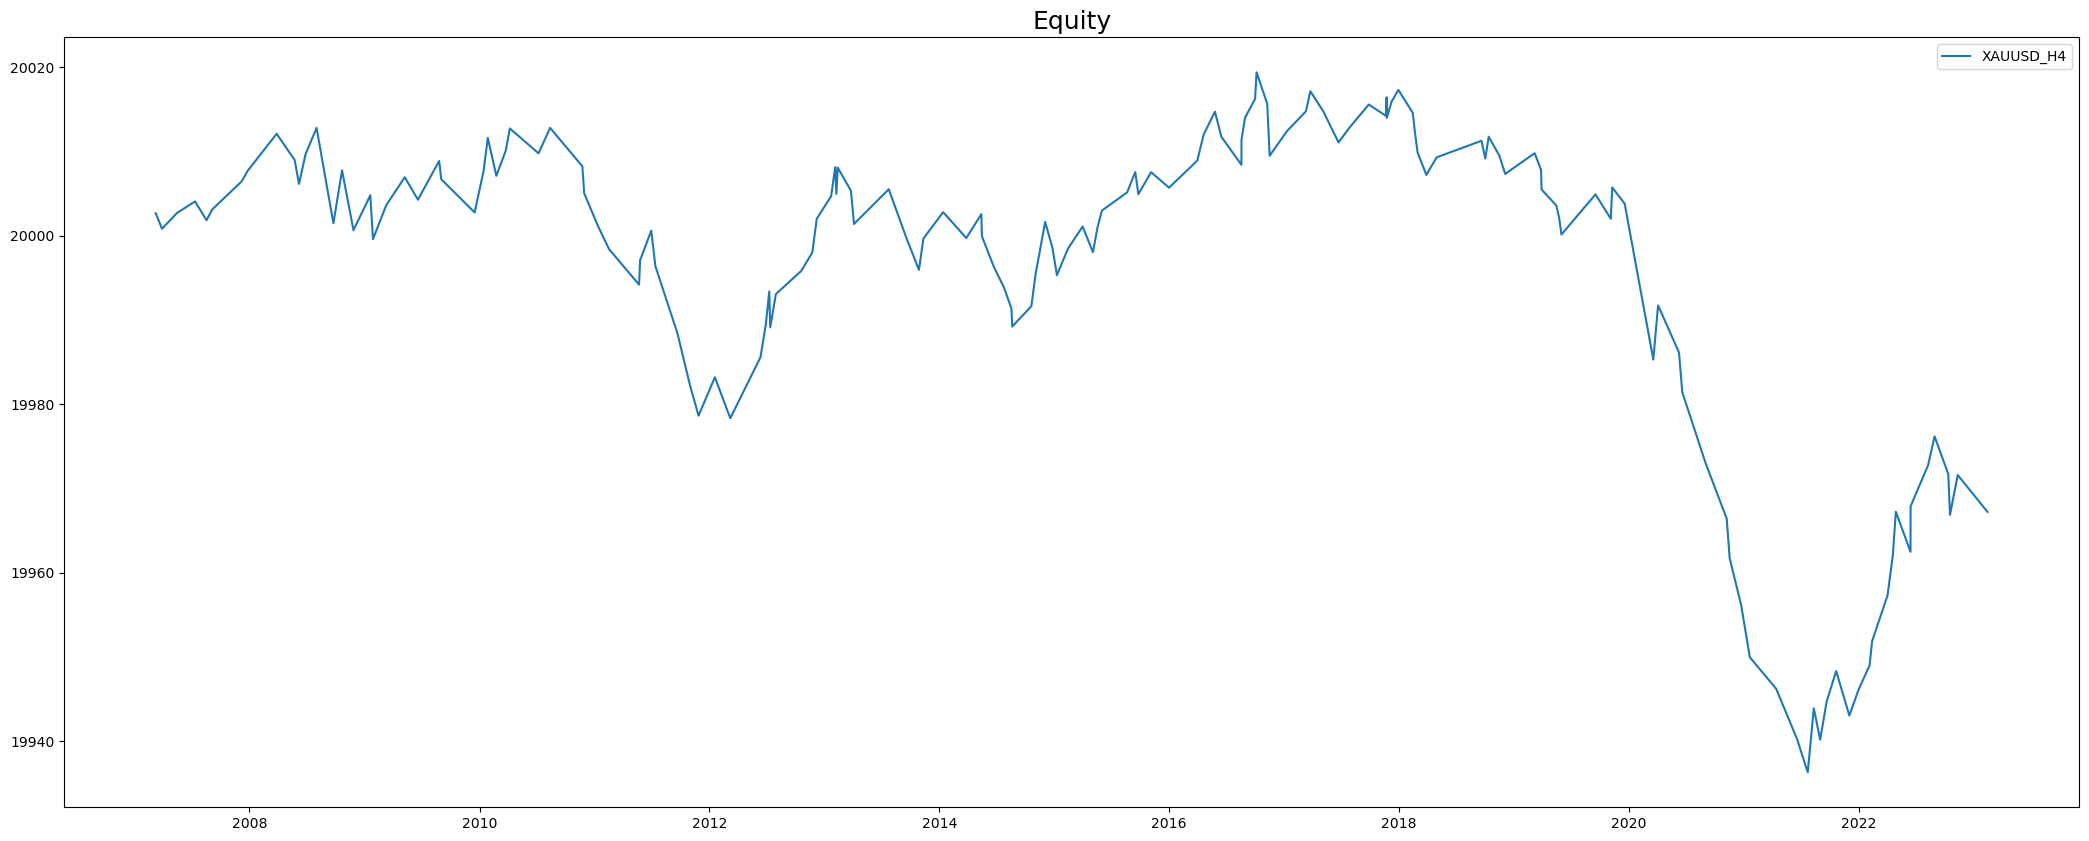

In [33]:
plot_equity_trades(result_H4['_trades'], 'XAUUSD_H4' , account_size)

## TF H1

In [34]:
Backtest_H1 = Backtest(XAUUSD['H1'], SMA_crossover,
                       cash=account_size, margin=1/2000, )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                    0.955551
Equity Final [$]                 19910.996975
Equity Peak [$]                    20008.2032
Return [%]                          -0.445015
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                   -0.022285
Volatility (Ann.) [%]                0.057826
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.519205
Avg. Drawdown [%]                    -0.11982
Max. Drawdown Duration     3368 days 20:00:00
Avg. Drawdown Duration      826 days 07:00:00
# Trades                                  570
Win Rate [%]                        46.315789
Best Trade [%]                       0.518401
Worst Trade [%]                     -0.493825
Avg. Trade [%]                    

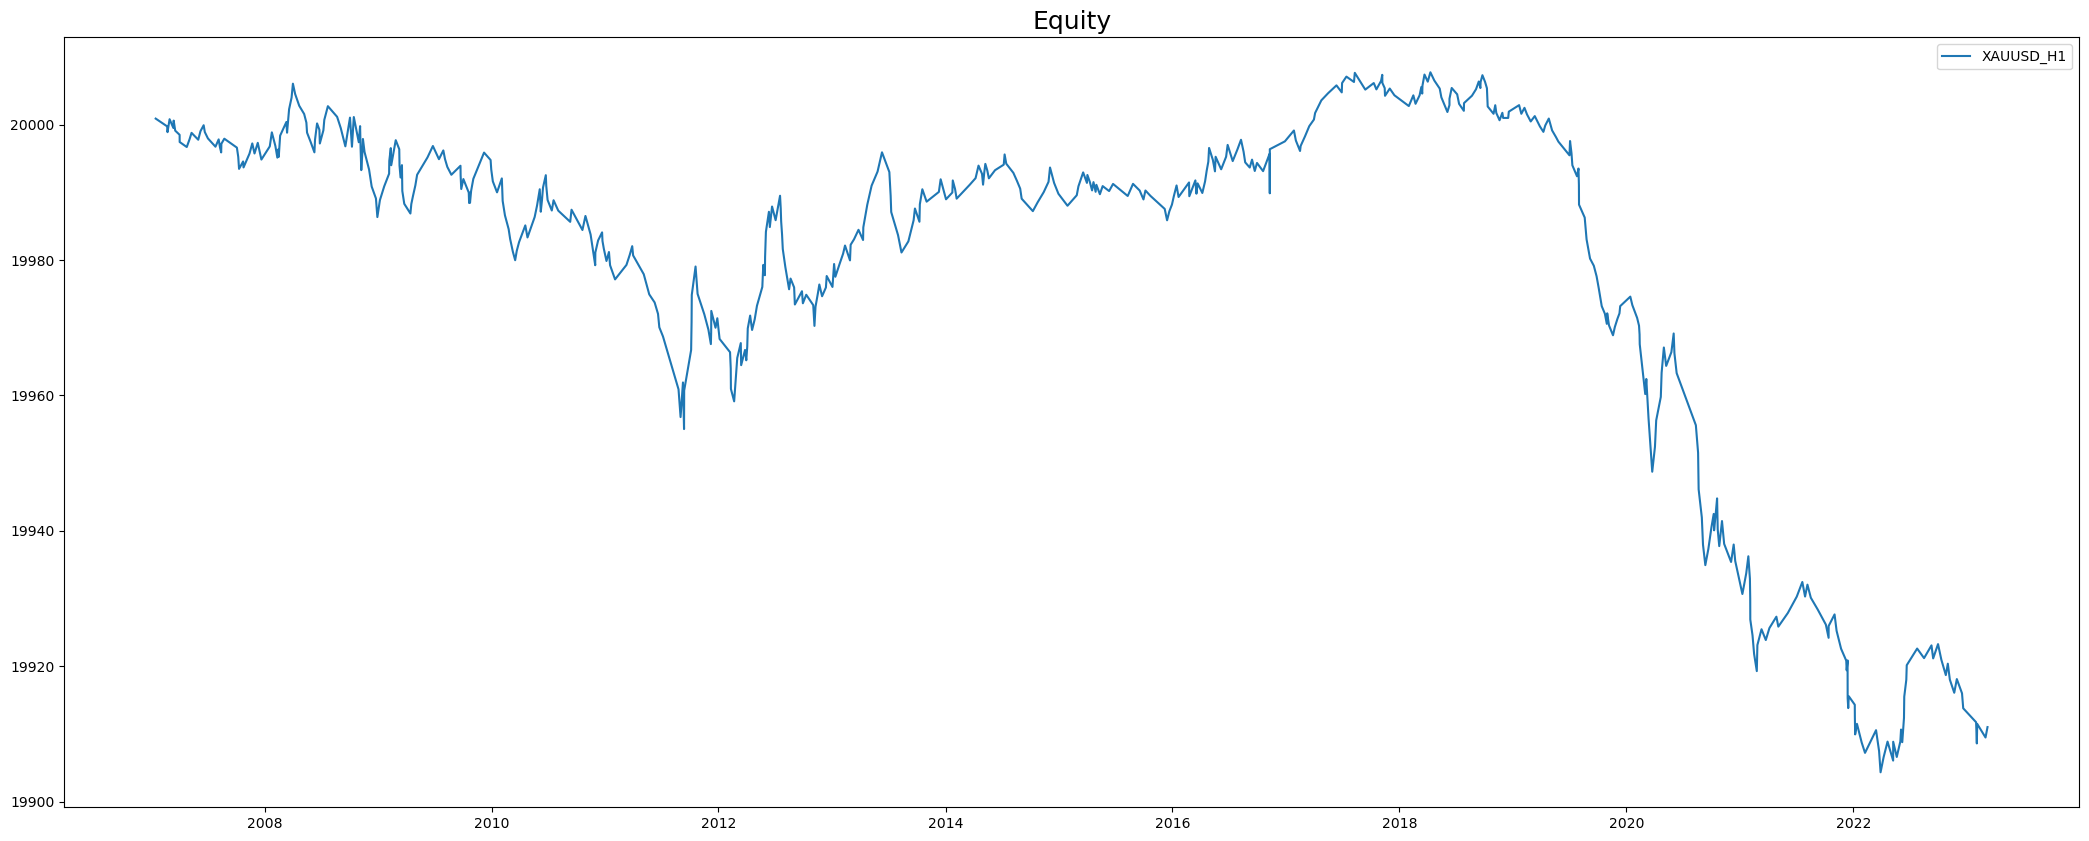

In [37]:
plot_equity_trades(result_H1['_trades'], 'XAUUSD_H1', account_size)

## TF M30 

In [36]:
Backtest_M30 = Backtest(XAUUSD['M30'], SMA_crossover,
                       cash=account_size, margin=1/2000, )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                    1.128884
Equity Final [$]                 19865.287075
Equity Peak [$]                  20000.845825
Return [%]                          -0.673565
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                   -0.033766
Volatility (Ann.) [%]                0.058773
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                    -0.69958
Avg. Drawdown [%]                    -0.69958
Max. Drawdown Duration     5882 days 06:00:00
Avg. Drawdown Duration     5882 days 06:00:00
# Trades                                 1198
Win Rate [%]                        45.409015
Best Trade [%]                        0.46963
Worst Trade [%]                     -0.679136
Avg. Trade [%]                    

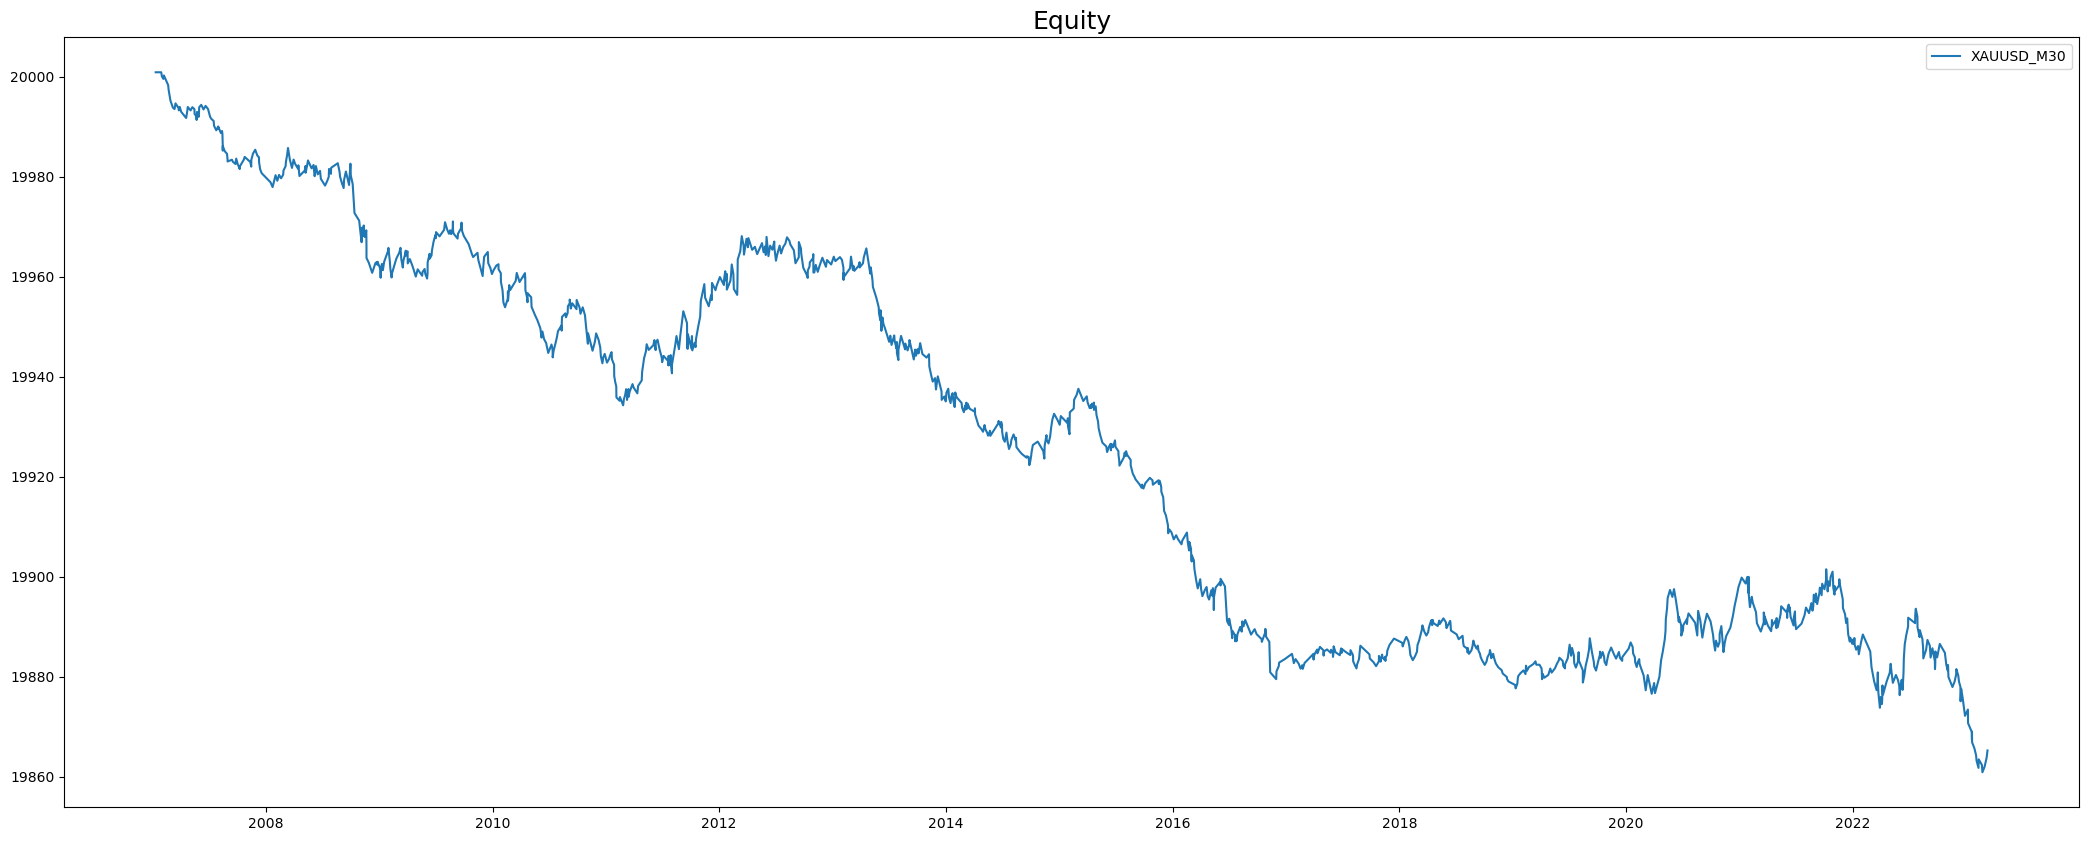

In [55]:
plot_equity_trades(result_M30['_trades'], 'XAUUSD_M30', account_size)

In [41]:
XAUUSD['M1']

,Open,High,Low,Close,Volume
Time,,,,,
2022-08-16 23:13:00,1775.538,1775.715,1775.418,1775.715,1
2022-08-16 23:14:00,1775.715,1775.778,1775.628,1775.778,1
2022-08-16 23:15:00,1775.688,1775.688,1775.628,1775.638,1
2022-08-16 23:16:00,1775.628,1775.668,1775.598,1775.668,1
2022-08-16 23:17:00,1775.648,1775.668,1775.638,1775.668,1
...,...,...,...,...,...
2023-03-10 17:55:00,1864.635,1864.945,1864.358,1864.628,1
2023-03-10 17:56:00,1864.635,1864.985,1864.534,1864.985,1
2023-03-10 17:57:00,1865.005,1865.005,1864.415,1864.418,1
